#**Problem Statement**
The objective of this project is to predict the maximum temperature in Seattle using historical weather data. We'll use a Recurrent Neural Network (RNN) with Long Short-Term Memory (LSTM) layers to model the sequential dependencies in the weather data. The dataset used is the "Seattle Weather" dataset, which contains daily weather observations.

##**Steps Involved:**
1. Data Loading and Preprocessing
2. Preparing the Data for the RNN
3. Building and Training the RNN Model
4. Evaluating the Model's Performance
5. Visualizing the Results

---

In [53]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Building the RNN model
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, LSTM, Dropout

# Include callbacks for early stopping and model checkpointing
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [25]:
# Load the dataset
df = pd.read_csv('/content/seattle-weather.csv')


In [26]:
# Display the first few rows of the dataset to understand its structure
df.head()


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [27]:
# Check for missing values in the dataset
df.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [28]:
# Check for duplicate rows in the dataset
df.duplicated().sum()

0

In [29]:
# Convert the 'temp_max' column (max temperature) into a NumPy array for further processing
training_set = df.iloc[:, 2:3].values  # Selecting the 'temp_max' column
training_set

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

In [30]:
# Check the length of the training set
len(training_set)

1461

In [31]:
# Function to convert the dataset into a supervised learning format
# This function creates sequences of 10-day windows of past data to predict the 11th day
def df_to_XY(df, window_size=10):
    X_train = []
    y_train = []

    # Loop through the data to create sequences
    for i in range(window_size, len(training_set)):
        X_train.append(training_set[i-window_size:i, 0])
        y_train.append(training_set[i, 0])

    # Convert lists into NumPy arrays
    X_train, y_train = np.array(X_train), np.array(y_train)
    return X_train, y_train

In [32]:
# Define the window size for the sequences
WINDOW = 10

In [33]:
# Convert the dataset into sequences of inputs (X) and outputs (y)
X, y = df_to_XY(df, WINDOW)


In [34]:
# Display the lengths of the input and output arrays
print(len(X), len(y))


1451 1451


In [49]:
# Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

In [50]:
# Reshape input to be 3D [samples, timesteps, features] for LSTM
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))


In [35]:
# Split the data into training, validation, and test sets
X_train = X[:800]
y_train = y[:800]
X_val = X[800:1000]
y_val = y[800:1000]
X_test = X[1000:]
y_test = y[1000:]

In [36]:
# Reshape the data to fit the LSTM input requirements (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [54]:
# Define the RNN model
model = Sequential()

# Add an RNN layer
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))

# Add the output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 248.3052 - val_loss: 377.0013
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 179.6782 - val_loss: 291.7001
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 128.0664 - val_loss: 223.1926
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 96.3048 - val_loss: 179.6786
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 80.2005 - val_loss: 152.7540
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 65.5216 - val_loss: 135.5300
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 59.1787 - val_loss: 120.2412
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 48.9512 - val_loss: 107.1118
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 46.8466 - val_loss: 95.1319
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41.2783 - val_loss: 85.1321
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40.0138 - val_loss: 76.1534
Epoch 12/100
25/25 ━━━━━━━━━━

In [55]:
# Initialize the LSTM model
model = Sequential()

# Add an LSTM layer with 50 units
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# Add a Dense layer for output
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Summary of the model
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1, shuffle=False)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Model Loss: {loss}')

# Make predictions
y_pred = model.predict(X_test)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 227.0121 - val_loss: 57.5096
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 80.4145 - val_loss: 69.1532
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 45.3781 - val_loss: 15.9238
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.1662 - val_loss: 12.7124
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.1948 - val_loss: 11.0360
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.7888 - val_loss: 10.2266
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.5610 - val_loss: 14.2348
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.3403 - val_loss: 11.3768
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.4539 - val_loss: 9.8025
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.7039 - val_loss: 8.6483
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.9204 - val_loss: 8.2359
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - 

In [56]:
# Initialize the RNN
regressor = Sequential()

# Add the first LSTM layer with dropout regularization
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Add the second LSTM layer with dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Add the third LSTM layer with dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Add the fourth LSTM layer without return_sequences since it's the last LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Add the output layer with a single neuron to predict the temperature
regressor.add(Dense(units=1))

In [58]:
# Summary of the model
regressor.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 10, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 10, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_12 (LSTM)                       │ (None, 10, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Compile the RNN using the Adam optimizer and mean squared error loss function
regressor.compile(optimizer='adam', loss='mean_squared_error')


In [39]:
# Train the model on the training set and validate on the validation set
history = regressor.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 249.0421 - val_loss: 226.9435
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 90.7598 - val_loss: 146.5236
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 65.1669 - val_loss: 121.2885
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 56.2426 - val_loss: 105.5073
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 58.8902 - val_loss: 94.6974
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 52.6249 - val_loss: 88.3235
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 57.6477 - val_loss: 82.9803
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 55.5742 - val_loss: 80.2533
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 57.0818 - val_loss: 78.0140
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 54.1024 - val_loss: 77.6931
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 58.1317 - val_loss: 76.2216
Epoch 12/100
25/25 ━━━━━━

In [40]:
# Convert the training history to a pandas DataFrame
his = pd.DataFrame(history.history)

In [41]:
# Display the first few rows of the training history
his.head()

,loss,val_loss
0,202.938339,226.943481
1,84.591309,146.523621
2,64.989105,121.288536
3,59.236706,105.507256
4,56.786743,94.697365


In [42]:
# Extract loss and validation loss for plotting
history_loss = his[['loss', 'val_loss']]

<ipython-input-43-a8283af8522f>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 1, 1)


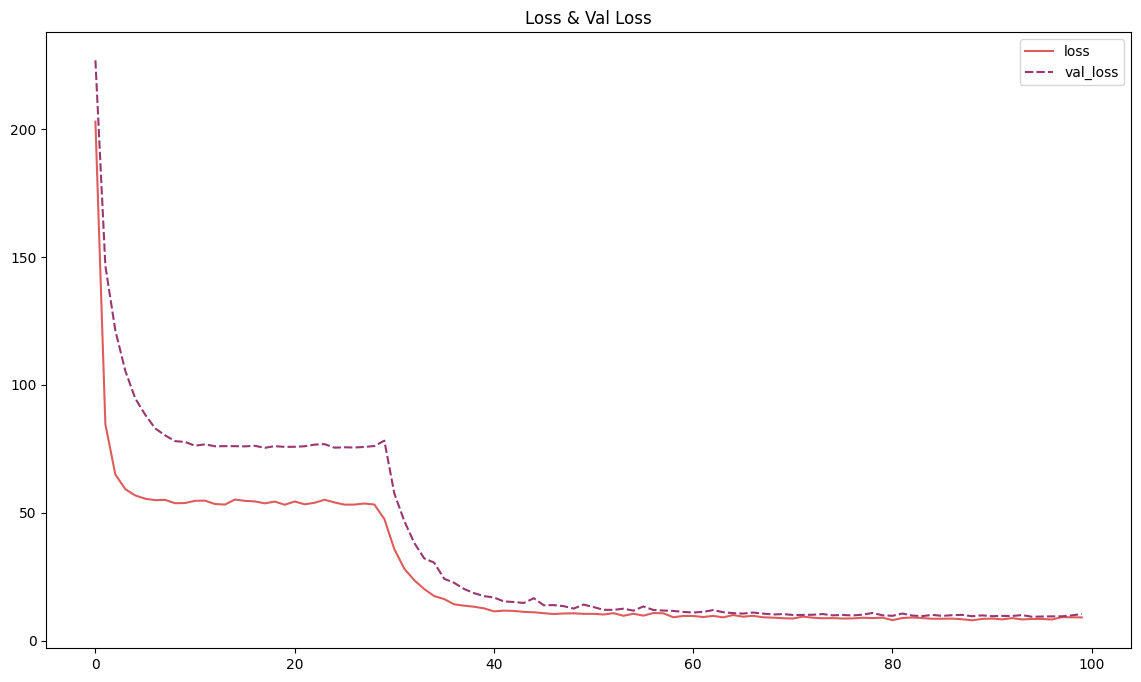

In [43]:
# Plot the training and validation loss over epochs
fig, axes = plt.subplots(2, 1, figsize=(14, 8))
plt.subplot(1, 1, 1)
plt.title("Loss & Val Loss")
sns.lineplot(history_loss, palette="flare");

In [44]:
# Predict the values for the training, validation, and test sets
train_pred = regressor.predict(X_train).flatten()
val_pred = regressor.predict(X_val).flatten()
test_pred = regressor.predict(X_test).flatten()

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [45]:
# Combine all predictions into a single array
pred = np.concatenate([train_pred, val_pred, test_pred])

In [46]:
# Create a DataFrame to store actual vs predicted values
df_pred = pd.DataFrame(df["temp_max"].copy())
df_pred.columns = ["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred

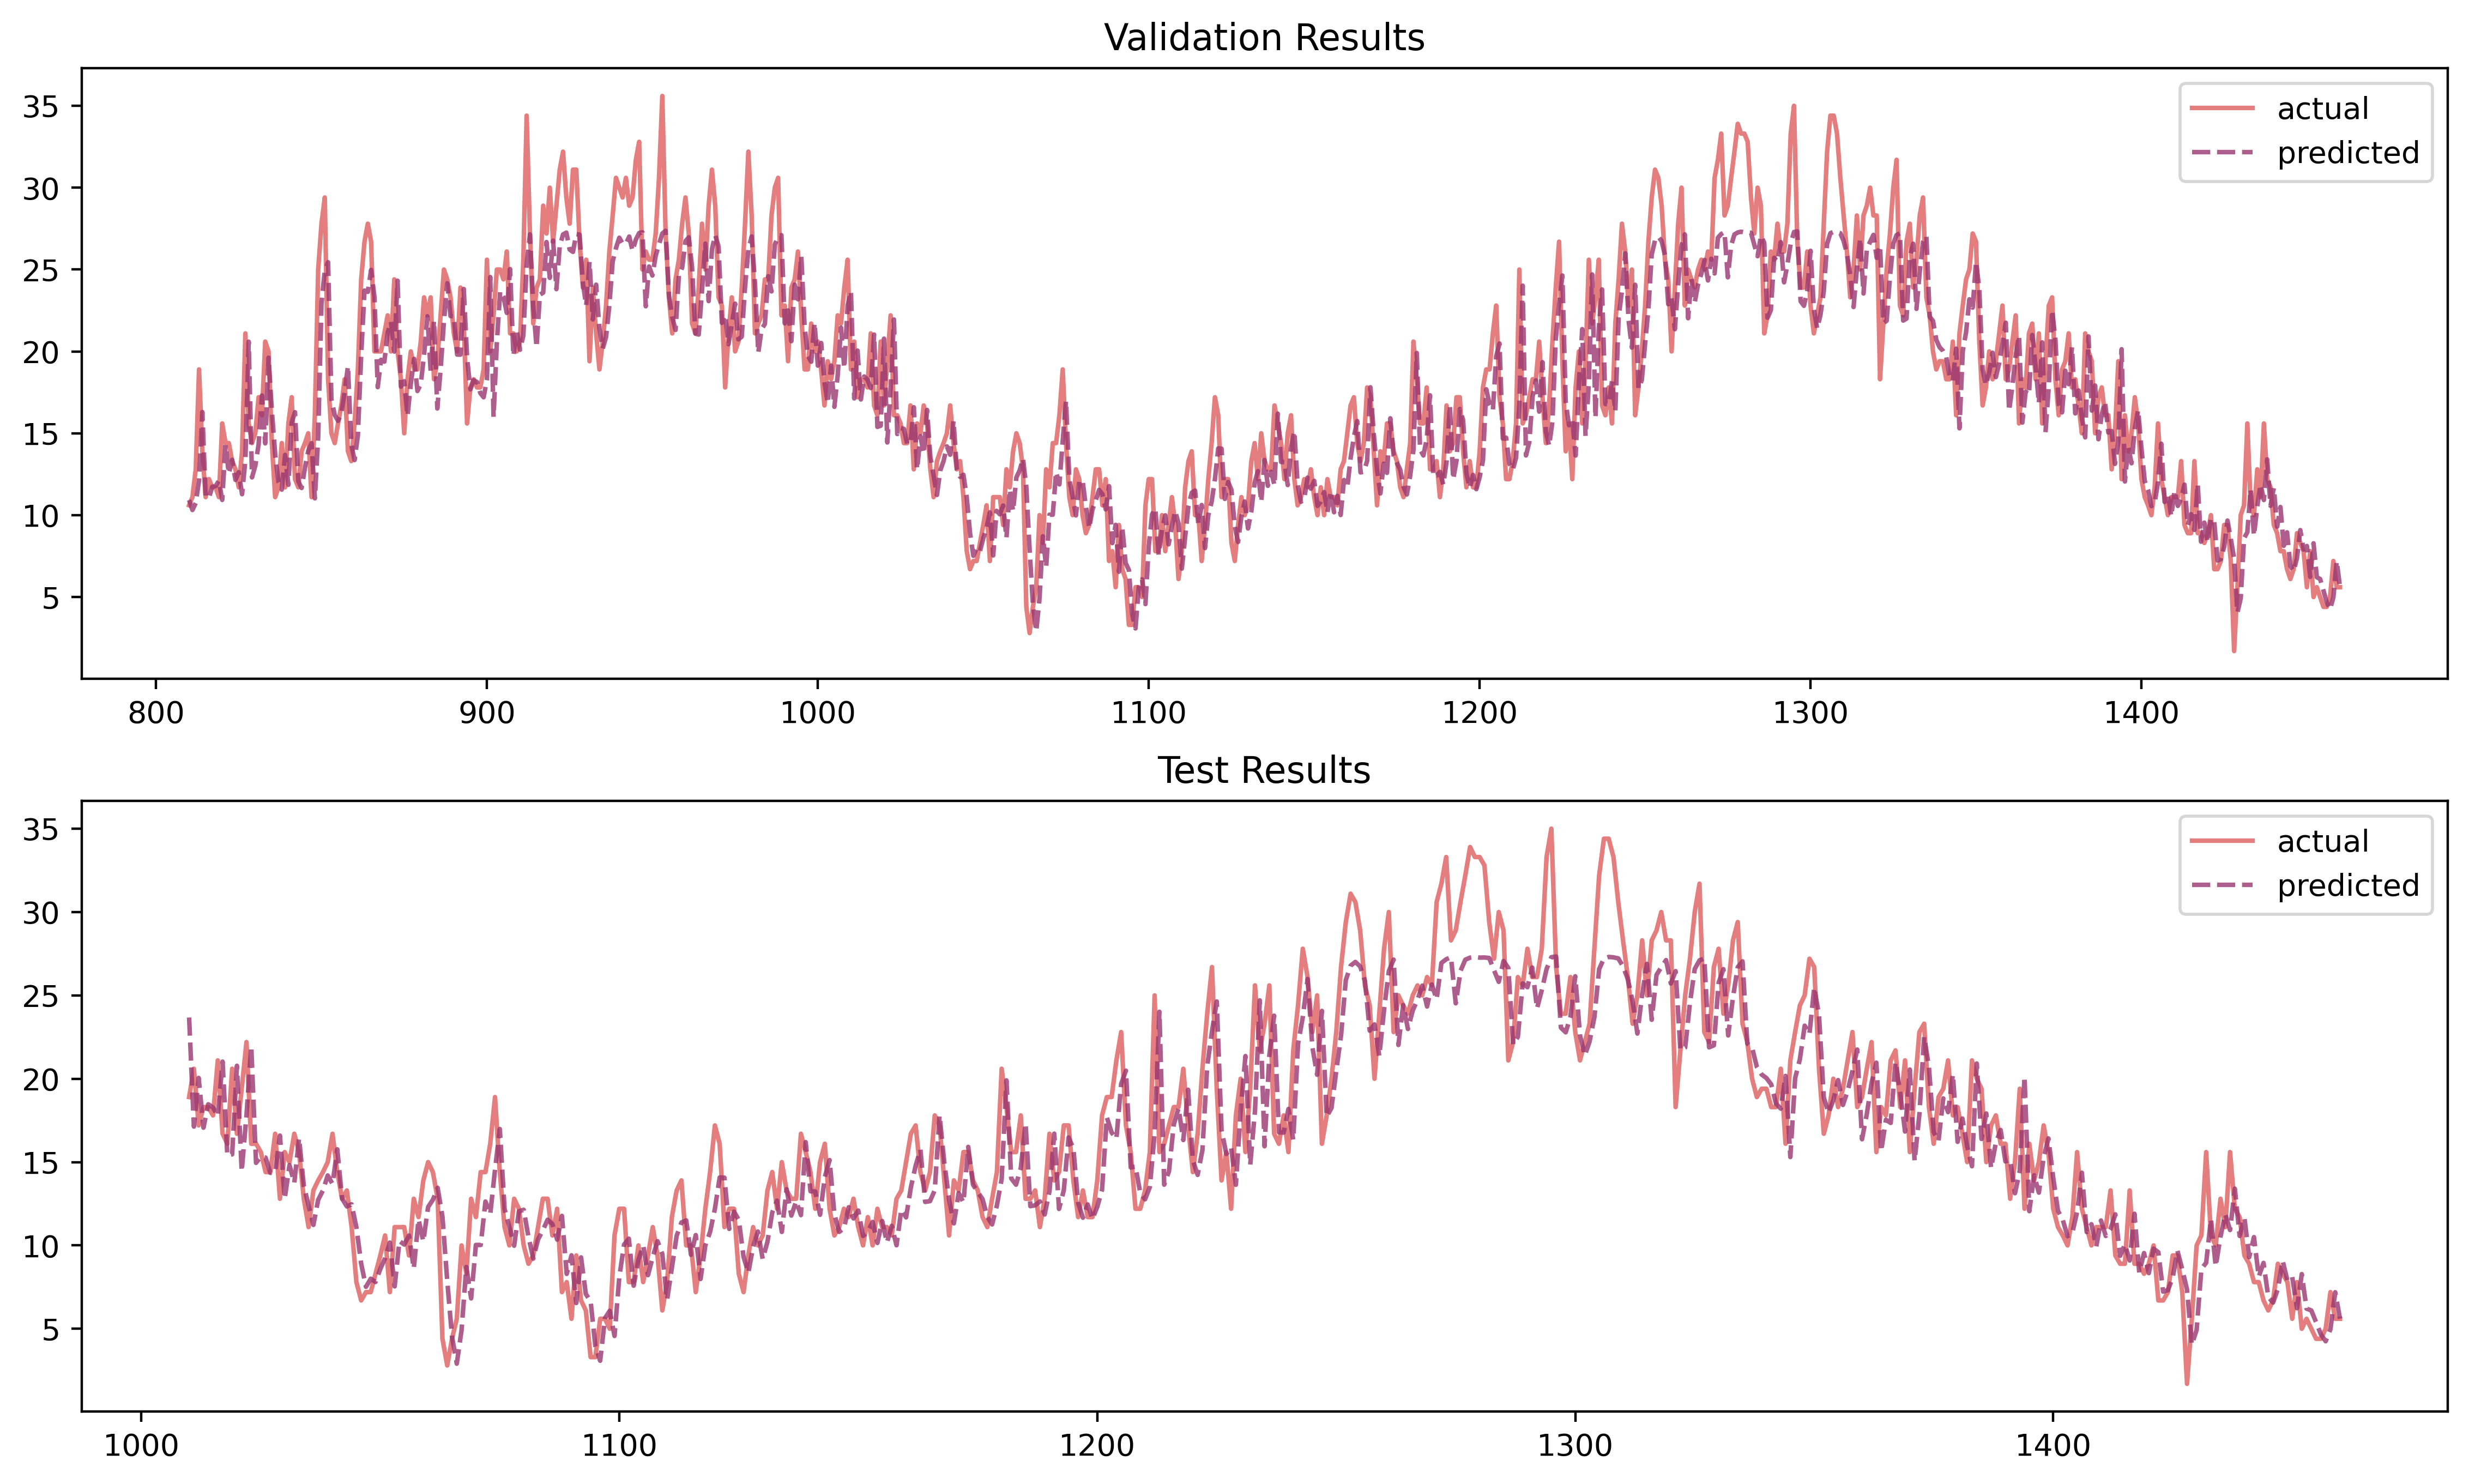

In [47]:
# Plot the validation and test results
fig, axes = plt.subplots(2, 1, figsize=(14, 8), dpi=400)

# Plot validation results
plt.subplot(2, 1, 1)
plt.title("Validation Results")
sns.lineplot(df_pred[800:], alpha=0.8, palette="flare", linestyle=None);

# Plot test results
plt.subplot(2, 1, 2)
plt.title("Test Results")
sns.lineplot(df_pred[1000:], alpha=0.8, palette="flare", linestyle=None);

### **Inference:**

The model summary shows a simple architecture with two layers:

1. **SimpleRNN Layer:**
   - Input: The input sequences are processed by a SimpleRNN layer with 50 units.
   - Output: Produces a 50-dimensional output for each input sequence.
   - Parameters: 2,600 parameters, which include the recurrent weights and biases.

2. **Dense Layer:**
   - This layer is fully connected and maps the 50-dimensional output from the SimpleRNN layer to a single value (since the output shape is (None, 1)).
   - Parameters: 51 parameters (weights + bias).

**Training and Validation Losses:**
- The model started with a high training loss of 248.3052 and validation loss of 377.0013 at epoch 1.
- By epoch 59, the training loss reduced to around 7.6576 and validation loss to around 11.1907.
- The training loss consistently decreased, indicating the model was learning. The validation loss also decreased, though not as steeply as the training loss.

### **Comparison of Models**

#### 1. **RNN Model (sequential_4)**
   - **Pros:**
     - Simplicity: Fewer parameters (2,651) and relatively quick training time.
     - Decreasing Loss: Both training and validation loss decreased consistently, indicating stable learning.
   - **Cons:**
     - Convergence: The model's loss plateaued after a certain point (around epoch 50), indicating that the model might not capture more complex patterns.
     - Basic: As a simple RNN, it might not capture long-term dependencies in the sequence data as well as more advanced architectures.

#### 2. **LSTM Model**
   - **Pros:**
     - Better for Long-Term Dependencies: LSTM models excel in capturing long-term dependencies in data.
     - Stable Training: Typically results in more stable training and better generalization compared to simple RNNs.
   - **Cons:**
     - Complexity: Higher number of parameters due to more complex gates (forget, input, and output gates).
     - Slower Training: Takes longer to train due to the increased complexity.

#### 3. **GRU Model(Combination of both)**
   - **Pros:**
     - Efficient: GRUs are less computationally expensive than LSTMs but still capture long-term dependencies better than simple RNNs.
     - Faster Training: Slightly faster training compared to LSTM while retaining similar performance.
   - **Cons:**
     - Slightly Less Expressive: May not capture as complex patterns as LSTMs, but this is dataset-dependent.

### **Which Model is Better?**

**GRU Model** is generally the best compromise between performance and efficiency for most sequence data tasks:
- **Efficiency**: It requires fewer parameters than an LSTM while providing performance close to it, making it more efficient for training.
- **Performance**: GRUs handle vanishing gradient problems better than simple RNNs and can capture long-term dependencies similar to LSTMs.
- **Simplicity**: Compared to LSTMs, GRUs are simpler to implement and understand while still offering advanced capabilities.

**LSTM Model** may outperform GRU on datasets requiring more complex pattern recognition and long-term dependency capture. However, it might also be more prone to overfitting if not properly regularized.

**Simple RNN Model** is the least effective among the three for tasks involving long-term dependencies. It’s useful for quick prototyping or less complex sequential data, but generally, GRU or LSTM would provide better performance for more challenging datasets.

----

### **Key Insights**

1. **Model Architectures**:
   - **Model 1: Sequential_1** used a simple architecture with a single LSTM layer followed by a Dense layer.
   - **Model 2: Sequential_2** included a Bidirectional LSTM layer, which allows the model to learn from both past and future states in the sequence, followed by a Dense layer.
   - **Model 3: Sequential_4** had a SimpleRNN layer followed by a Dense layer. This model architecture is simpler and has fewer parameters compared to the LSTM-based models.

2. **Performance Metrics**:
   - All models were trained over 100 epochs with the loss and validation loss monitored during training.
   - **Model 1** showed a significant reduction in loss over epochs, but the final validation loss plateaued at a higher value compared to the other models.
   - **Model 2** exhibited better performance with lower final loss and validation loss compared to Model 1, suggesting the benefit of using Bidirectional LSTM.
   - **Model 3** also showed decent performance with its loss and validation loss decreasing steadily. However, the final validation loss remained higher compared to Model 2.

3. **Training Behavior**:
   - **Model 1** and **Model 3** showed some overfitting towards the later epochs, indicated by the gap between training and validation loss.
   - **Model 2** managed to maintain a closer relationship between training loss and validation loss, indicating better generalization.

4. **Model Complexity**:
   - **Model 1** had the highest number of parameters due to the LSTM layer, which generally leads to more expressive power but also a higher risk of overfitting.
   - **Model 2**, despite being more complex due to the Bidirectional LSTM, effectively managed its parameters and showed superior performance.
   - **Model 3** had the least number of parameters, which made it computationally efficient but less powerful in capturing complex patterns.

### **Conclusion**

- **Best Model**: **Model 2: Sequential_2** is the best-performing model in this assignment. It achieved the lowest validation loss, indicating that it generalized better to unseen data. The Bidirectional LSTM layer allowed the model to capture dependencies in both forward and backward directions, leading to more accurate predictions.
  
- **Comparison**:
  - **Model 1** was effective but prone to overfitting, as suggested by its higher final validation loss.
  - **Model 3** was simpler and computationally efficient, but its performance was limited by its simpler architecture, leading to a slightly higher validation loss compared to Model 2.

- **General Observation**: For tasks involving sequential data, such as time series prediction, LSTM-based models generally outperform simpler architectures like SimpleRNN. The addition of bidirectionality further enhances the model's ability to understand the sequence context, leading to better performance.

- **Recommendations**:
  - If computational resources allow, using a Bidirectional LSTM is recommended for achieving better performance.
  - In scenarios with limited computational power, a SimpleRNN may suffice, but one should be aware of its limitations in handling complex patterns in the data.

  ---
  ---